INF2178 Assignment 3\
Yuanyuan Pan\
1003980150

# Early Child Longitudinal Study Analysis

Motivated by the discrepancy found on the academic performance of early childhood education, the primary goal of this study is to investigate the factor, particularly in the context of income disparities, that may influence 1999 spring academic scores while controlling for the 1998 fall academic performance. The study employs statistical techniques, including the exploratory data analysis (EDA) and analysis of covariance (ANCOVA), to gain insights into how income groups might affect child’s spring academic scores in 1999 after accounting for 1998 fall scores as covariates.

In [2]:
# Run this chunk to upload the input data file
from google.colab import files
files_upload = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data.csv


In [32]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
# read data into dataframe and take a glimpse of the data
ChildDf = pd.read_csv('INF2178_A3_data.csv')
ChildDf.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


## Data Pre-Processing and Cleaning

In [34]:
# list of columns that will be used in later analysis
cols_to_use = ['fallmathscore', 'fallgeneralknowledgescore',
               'springmathscore', 'springgeneralknowledgescore', 'incomegroup']
# slicing relevant columns and assigned to new data frame
ScoreDF = ChildDf[cols_to_use]

# take a glimpse of the new data
ScoreDF.head()

,fallmathscore,fallgeneralknowledgescore,springmathscore,springgeneralknowledgescore,incomegroup
0,39.54,33.822,50.10,40.533,3
1,44.44,38.147,58.93,37.409,3
2,28.57,28.108,32.81,29.312,3
3,23.57,15.404,35.25,27.382,2
4,19.65,18.727,23.60,26.977,2


## Exploratory Data Analysis (EDA)

In [35]:
# This chunk of code refers to the INF2178 lecture code
# define a function to get the report of statistics
def get_summary_statistics(dataset):

    # compute statistics
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    sd = np.round(np.std(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    # print all the results
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Standard deviation: %s' % sd)

In [36]:
# get Fall General Knowledge Score summary statistics
print('\nFall General Knowledge Score summary statistics')
get_summary_statistics(ScoreDF['fallgeneralknowledgescore'])


Fall General Knowledge Score summary statistics
Min: 6.98
Mean: 23.07
Max: 47.69
25th percentile: 17.39
Median: 22.95
75th percentile: 28.3
Interquartile range (IQR): 10.91
Standard deviation: 7.4


In [37]:
# get Spring General Knowledge Score summary statistics
print('\nSpring General Knowledge Score summary statistics')
get_summary_statistics(ScoreDF['springgeneralknowledgescore'])


Spring General Knowledge Score summary statistics
Min: 7.86
Mean: 28.24
Max: 48.34
25th percentile: 22.8
Median: 28.58
75th percentile: 33.78
Interquartile range (IQR): 10.98
Standard deviation: 7.58


In [38]:
# get Fall Math Score summary statistics
print('\nFall Math Score summary statistics')
get_summary_statistics(ScoreDF['fallmathscore'])


Fall Math Score summary statistics
Min: 10.51
Mean: 27.13
Max: 115.65
25th percentile: 20.68
Median: 25.68
75th percentile: 31.59
Interquartile range (IQR): 10.91
Standard deviation: 9.12


In [39]:
# get Spring Math Score summary statistics
print('\nSpring Math Score summary statistics')
get_summary_statistics(ScoreDF['springmathscore'])


Spring Math Score summary statistics
Min: 11.9
Mean: 37.8
Max: 113.8
25th percentile: 29.27
Median: 36.41
75th percentile: 44.22
Interquartile range (IQR): 14.95
Standard deviation: 12.03


By examining the above statistics, the mean math score increased around 10 units while the mean general knowledge score increased around 5 units ; the median has increased about a similar amount compared to the mean. The interquartile range (IQR) are the same for both math and general knowledge scores in fall, however, IQR of math score increased about 4 units while general knowledge score almost remained the same in the spring. This shows that the spread in spring math score has widened, indicating a larger dispersion of data points around the median, which could also be detected by examining the above standard deviation. While the standard deviation of general knowledge almost remains the same from fall to winter, math score shows a clear increase, which indicates an increase in variation of the data.



Text(0.5, 1.0, 'Distribution of Fall General Knowledge Score (1998)')

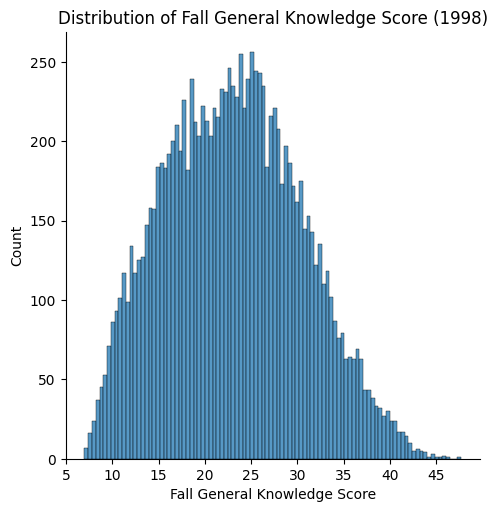

In [40]:
# Create a histogram for Fall General Knowledge Score distribution
sns.displot(ScoreDF['fallgeneralknowledgescore'], bins=100)
plt.xlabel('Fall General Knowledge Score')
plt.title('Distribution of Fall General Knowledge Score (1998)')

Text(0.5, 1.0, 'Distribution of Spring General Knowledge Score (1999)')

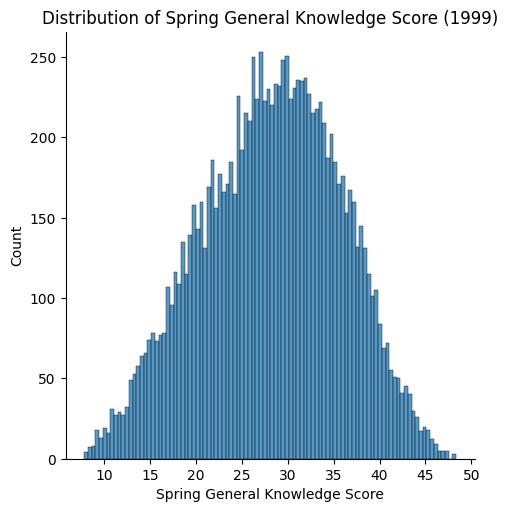

In [41]:
# Create a histogram for Spring General Knowledge Score distribution
sns.displot(ScoreDF['springgeneralknowledgescore'], bins=100)
plt.xlabel('Spring General Knowledge Score')
plt.title('Distribution of Spring General Knowledge Score (1999)')

By examining the above two histograms of general knowledge in both fall and spring terms, there is a shift of the middle 50% of the data to the right, indicating an increase in score from fall to winter regardless of the outliers. The spread of the data did not make obvious changes. Both histograms are unimodal and the shapes are almost symmetric, which means that they both are closed to a normal distribution. The distribution of sprin scores perform a better symmetric shape than the fall term. The histogram of fall term score peaks at around 25 while the spring term score peaks at around 30. In the case of measure of central tendency, both mean and median could be used as a measurement in the above two histogram since they are almost normal distribution.


Text(0.5, 1.0, 'Distribution of Fall math Score (1998)')

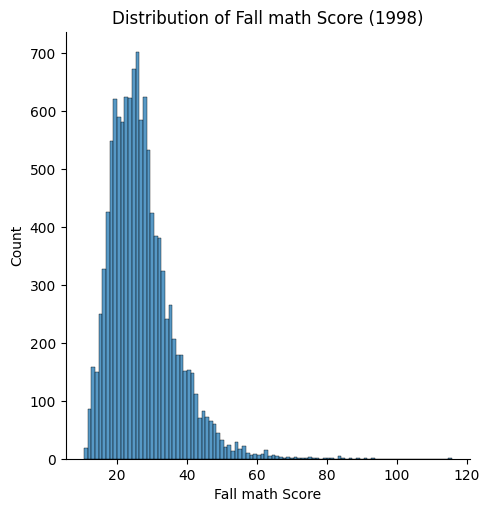

In [42]:
# Create a histogram for Fall Math Score distribution
sns.displot(ScoreDF['fallmathscore'], bins=100)
plt.xlabel('Fall math Score')
plt.title('Distribution of Fall math Score (1998)')

Text(0.5, 1.0, 'Distribution of Spring math Score (1999)')

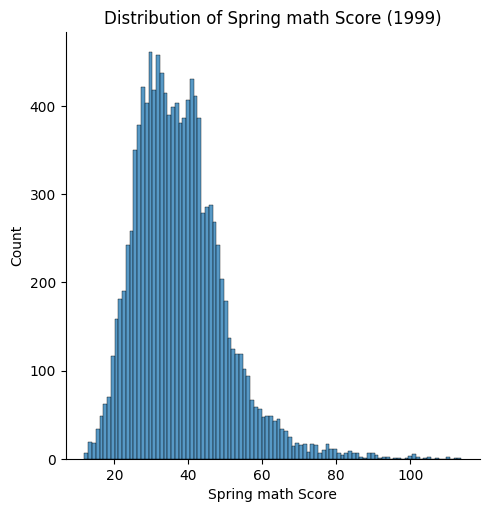

In [43]:
# Create a histogram for Spring Math Score distribution
sns.displot(ScoreDF['springmathscore'], bins=100)
plt.xlabel('Spring math Score')
plt.title('Distribution of Spring math Score (1999)')

By examining the two histograms of math score in both fall and spring terms above, two clear unimodal histograms have been shown with both positively skewed (right skewed). Spring math scores have a wider spread compared to fall term and it also has higher scores in the middle 50% of the data. While the data point of fall term score mostly gathered between 20-40, the data point of spring term score gather between 20-60, meaning there are more students scored higher marks. However, the higher peak in both term did not changed too much, while the fall score peaks at around 28, the spring score peaks at around 30.
Median is more suitable when measuring the central tendency since it is more robust to outliers.


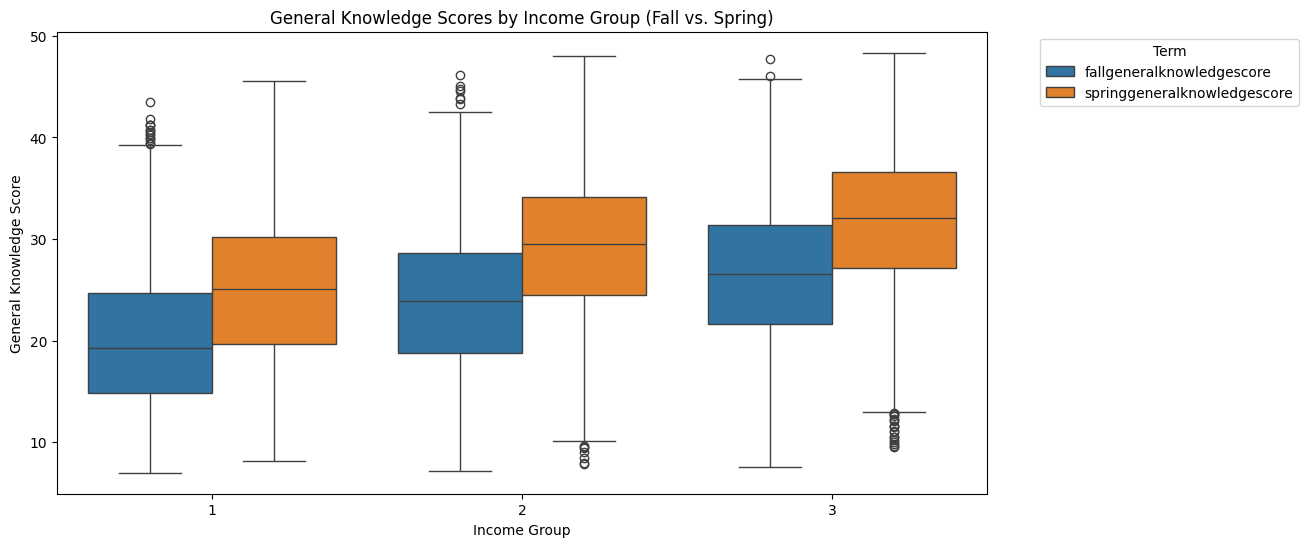

In [44]:
# melt the dataframe for combine box plot
score_melted = pd.melt(ScoreDF, id_vars=['incomegroup'],
                       value_vars=['fallgeneralknowledgescore',
                                   'springgeneralknowledgescore'],
                      var_name='term', value_name='generalknowledgescore')

# Create the combined boxplot,
## comparing fall and spring term general knowledge scores based on different
### income groups.
plt.figure(figsize=(12, 6))
sns.boxplot(data=score_melted, x='incomegroup',
            y='generalknowledgescore',
            hue='term')
plt.title('General Knowledge Scores by Income Group (Fall vs. Spring)')
plt.xlabel('Income Group')
plt.ylabel('General Knowledge Score')
plt.legend(title='Term', bbox_to_anchor=(1.05, 1))
plt.show()

Above is a combined box plot comparing fall and spring general knowledge scores based on different income groups. There is a clear increase in middle 50% data of general knowledge scores from 1 to 3 income groups regardless of the academic term, however, spring term score shows a high increase in middle 50% data when comparing to fall term in all income groups, shifted almost 5 units higher in scores. All outliers are detected in higher scores in fall term; the lower the income, the more the outliers. However, outliers in spring term are all detected in lower scores, and the higher the income, the more the outliers. This shows that from fall to the spring, students' academic performance has a high improvement in all income group, yet higher income group tends to have higher scores.


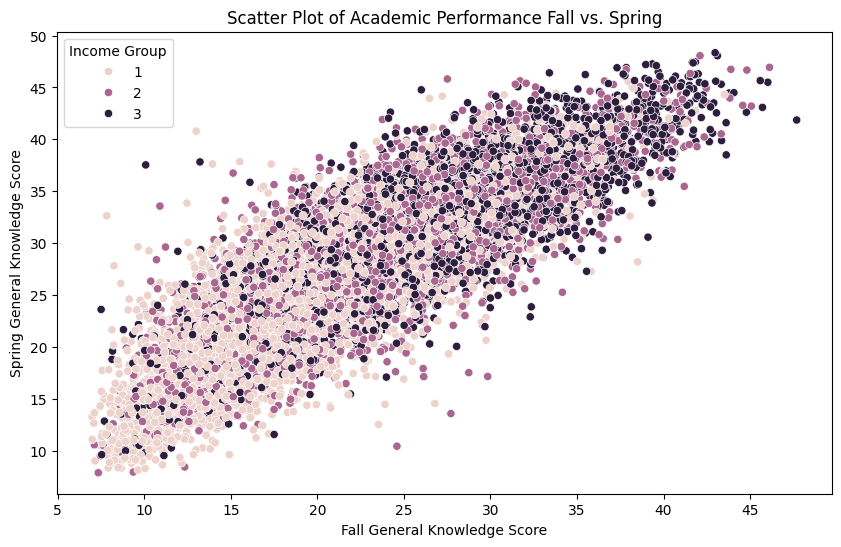

In [45]:
# scatter plot of fall vs. spring general knowledge scores by income groups.
## mark data pints with different colors by different income groups.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fallgeneralknowledgescore', y='springgeneralknowledgescore',
                hue='incomegroup', data=ScoreDF)
plt.title('Scatter Plot of Academic Performance Fall vs. Spring')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')
plt.legend(title='Income Group')
plt.show()

The scatter plot shows the relationship between fall and spring general knowledge scores, marked by different income groups. There is a clear positive linear relationship detected in the plot, indicating a high strength of correlation between fall and spring general knowledge scores. Other than that, most of the light pink data points gathered before score 20 while most of the black data points gathered above 30. This shows that under the whole trend of increasing in the score of general knowledge from fall to winter, low income group students tend to have lower scores compared to high income group students.

## One-Way ANCOVAs

1.\
Null Hypothesis (H0):\
There is no significant difference in the mean spring math scores across different income groups after controlling the effects of fall math scores.\
Alternative Hypothesis (H1):\
There is a significant difference in the mean spring math scores across different income groups after controlling the effects of fall math scores.

In [46]:
# download and import relevant package for the model
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pip install bioinfokit
from bioinfokit.analys import stat

In [47]:
# Perform the ANCOVA
## Independent Variable: Income Group
## Dependent Variable: Spring math score
## Covariate: Fall math score
model = ols(
    'springmathscore ~ incomegroup + fallmathscore',
    data=ScoreDF).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:22:31   Log-Likelihood:                -39805.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11930   BIC:                         7.964e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7862      0.215     36.286

The p-value associated with the F-statistics (PR(>F)) is less than 0.001, indicating the overall model is statistically significant, hence there is strong evidence to reject the null hypothesis.


In [49]:
# fit ANCOVA and residuals
res = stat()
res.anova_stat(df=ScoreDF, res_var='springmathscore',
               anova_model='springmathscore ~ incomegroup + fallmathscore')

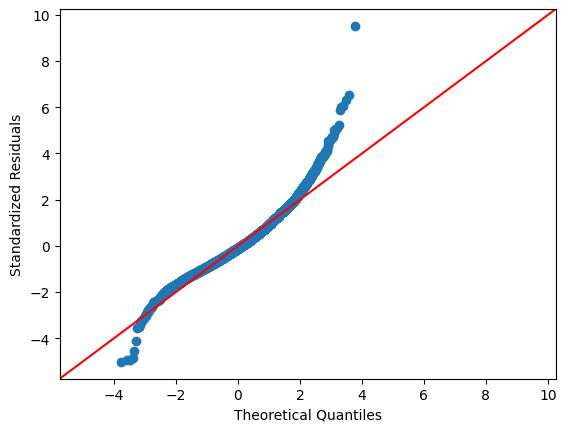

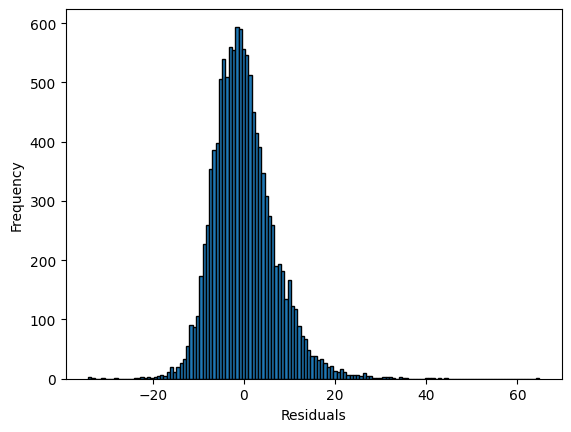

In [50]:
#checking model diagnostics
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [51]:
#assumption 2: variances are homogenous:
## Levene's test when the sample is not normally distributed
res.levene(df=ScoreDF, res_var='springmathscore',
             xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),18.8999
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


2.\
Null Hypothesis (H0):\
There is no significant difference in the mean spring general knowledge scores across different income groups after controlling the effects of fall general knowledge scores.

Alternative Hypothesis (H1):\
There is a significant difference in the mean spring general knowledge scores across different income groups after controlling the effects of fall general knowledge scores.


In [53]:
# Perform the ANCOVA
## Independent Variable: Income Group
## Dependent Variable: Spring general knowledge score
## Covariate: Fall general knowledge score
model = ols(
    'springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore',
    data=ScoreDF).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.621e+04
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 02:23:04   Log-Likelihood:                -33263.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11930   BIC:                         6.656e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

The p-value associated with the F-statistics (PR(>F)) is less than 0.001, indicating the overall model is statistically significant, hence there is strong evidence to reject the null hypothesis.


In [54]:
# fit ANCOVA and residuals
res = stat()
res.anova_stat(df=ScoreDF, res_var='springgeneralknowledgescore',
               anova_model='springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore')

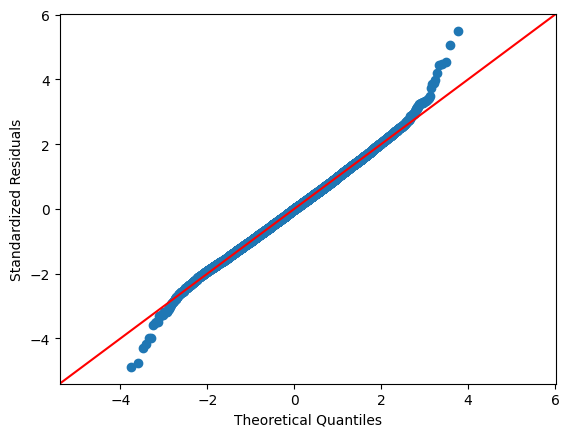

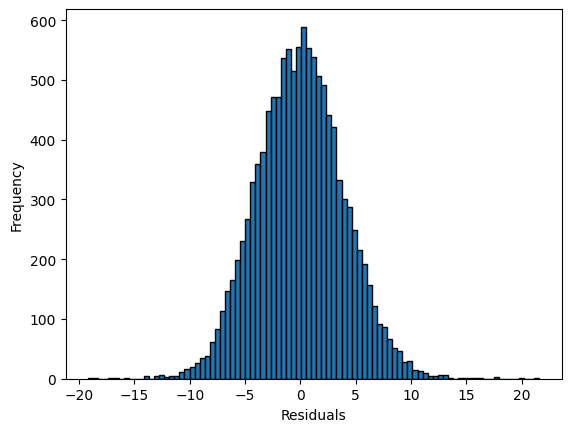

In [55]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [56]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9980871081352234 4.8981738803854924e-11


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
#assumption 2: variances are homoegenous:
## Bartlett's test when the sample is normally distributed
res = stat()
res.bartlett(df=ScoreDF, res_var='springgeneralknowledgescore',
             xfac_var='incomegroup')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),10.4095
1,Degrees of freedom (Df),2.0000
2,p value,0.0055


**Brief Conclusion**: There is strong evidence suggesting a significant difference detected in the mean spring math/general knowledge scores across different income groups after controlling the effects of covariate, fall math/general knowledge scores. As a whole, household income could be a crucial factor in affecting a child's performance in the context of education when controlling the previous term scores.

### Thanks for reading!